In [1]:
%cd attns


/home/robertflynn/cassini/exp/exp1/acp21rjf/deliberation/Custom/ami/attns


In [2]:
import numpy as np
import os
from tqdm import tqdm
import pickle as pkl
import torch
from matplotlib import pyplot as plt

In [3]:
data_dir = './'

In [4]:
attn_maps = []
for data in tqdm(os.listdir(data_dir)):
    if data.endswith('.npy'):
        attn_maps.append(np.load(data))

0it [00:00, ?it/s]


In [5]:
attn_map = attn_maps[0]

IndexError: list index out of range

In [ ]:
attn_maps[0].shape

IndexError: list index out of range

In [ ]:
distance_totals = {}
for attn_map in tqdm(attn_maps):
    n_mems = attn_map.shape[-2]
    for i, row in enumerate(attn_map):
        scores = row.mean(0).mean(0)
        for memseti in range(attn_map.shape[0]):
            startpos = memseti * n_mems
            endpos = startpos + n_mems
            distance = memseti - i
            total = scores[startpos:endpos].sum()
            if distance not in distance_totals:
                distance_totals[distance] = []
            distance_totals[distance].append(total)
# now take the average of each distance
for distance in distance_totals.keys():
    distance_totals[distance] = np.mean(distance_totals[distance])

0it [00:00, ?it/s]


In [ ]:
# sort by distance 
distance_totals = {k: v for k, v in sorted(distance_totals.items(), key=lambda item: item[0])}

In [ ]:
# remove distance that are more than 36 and less than -36 away
distance_totals_cut = {k: v for k, v in distance_totals.items() if k > -36 and k < 36}

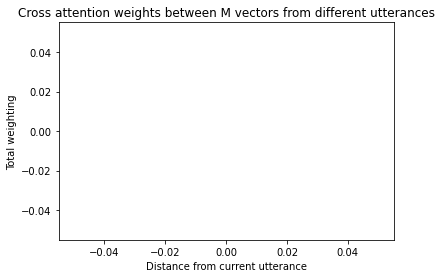

In [ ]:
plt.bar(distance_totals_cut.keys(), distance_totals_cut.values())
plt.xlabel("Distance from current utterance")
plt.ylabel("Total weighting")
plt.title("Cross attention weights between M vectors from different utterances")
plt.show()

In [ ]:
mem_distances = {}
num_mems = 10
mem_entry = 1001
mem_index = 15
attn_head = 3
mem_head = 'all'
mem_attn = attn_maps[mem_entry][mem_index]
mem_attn = mem_attn.mean(0) if attn_head == 'all' else mem_attn[attn_head]
mem_attn = mem_attn.mean(0) if mem_head == 'all' else mem_attn[mem_head]
for i in range(mem_attn.shape[0] // num_mems):
    startpos = i * num_mems
    endpos = startpos + num_mems
    distance = i - mem_index
    total = mem_attn[startpos:endpos].sum()
    mem_distances[distance] = total
mem_distances = {k: v for k, v in sorted(mem_distances.items(), key=lambda item: item[0])}

plt.bar(mem_distances.keys(), mem_distances.values())
plt.xlabel("Distance from current utterance")
plt.ylabel("Total weighting")
plt.show()

IndexError: list index out of range

newbit

In [ ]:
speaker_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
}

def render_attns(
        data,
        mem_index,
        attn_head='all',
        mem_head='all',
        num_mems=10,
    ):
    def get_mem_distance(mem_distances={}, mem_index=mem_index):
        mem_attn = data['attn_map'][mem_index]
        
        mem_attn = mem_attn.mean(0) if attn_head == 'all' else mem_attn[attn_head]
        mem_attn = mem_attn.mean(0) if mem_head == 'all' else mem_attn[mem_head]
        for i in range(mem_attn.shape[0] // num_mems):
            startpos = i * num_mems
            endpos = startpos + num_mems
            distance = i - mem_index
            total = mem_attn[startpos:endpos].sum()
            mem_distances[distance] = total
        mem_distances = {k: v for k, v in sorted(mem_distances.items(), key=lambda item: item[0])}
        return mem_distances
        
    if mem_index != 'all':
        mem_distances = get_mem_distance()
    else:
        mem_distances = {}
        for i in range(data['attn_map'].shape[0]):
            mem_distances = get_mem_distance(mem_distances, i)
        mem_distances = {k: v / data['attn_map'].shape[0] for k, v in mem_distances.items()}

    speakers = data['speaker_ids']
    unique_speakers = list(set(speakers))
    speakers_dict = {el:i for i,el in enumerate(unique_speakers)}
    speaker_colors_list = [speaker_colors[speakers_dict[speaker]] for speaker in speakers]

    # color bars by speaker
    plt.bar(mem_distances.keys(), mem_distances.values(), color=speaker_colors_list)
    
    plt.xlabel("Distance from current utterance")
    plt.ylabel("Total weighting")
    plt.show()

    for i, target in enumerate(data['targets']):
        if mem_index != 'all':
            print(f"Distance: {i - mem_index}, Target: {target}")
        else:
            print(f"Index: {i}, Target: {target}")

In [14]:
def open_attn(path):
    return torch.load(path, map_location='cpu')

In [15]:
render_attns(
    open_attn(sorted(os.listdir("./"), reverse=False)[-2]), 
    mem_index=32,
    attn_head=0,
    mem_head=0
)

IndexError: list index out of range

for adaptive mem_lengths

In [16]:
open_attn(sorted(os.listdir("./"), reverse=False)[-5])['attn_map'][0].mean(0)[100]

IndexError: list index out of range

In [17]:
open_attn(sorted(os.listdir("./"), reverse=False)[-5])['ds_lengths'].cumsum() - open_attn(sorted(os.listdir("./"), reverse=False)[-5])['ds_lengths']

IndexError: list index out of range

In [18]:
open_attn(sorted(os.listdir("./"), reverse=False)[0])['ds_lengths']

IndexError: list index out of range

In [19]:
open_attn(sorted(os.listdir("./"), reverse=False)[0])['ds_lengths'].cumsum()[12]

IndexError: list index out of range

In [21]:
open_attn(sorted(os.listdir("./"), reverse=False)[0])['attn_map'].shape

IndexError: list index out of range

In [22]:
open_attn(sorted(os.listdir("./"), reverse=False)[0])['attn_map'][0][0][0:46].mean(0)[204:207][1:].mean()

IndexError: list index out of range

In [23]:
open_attn(sorted(os.listdir("./"), reverse=False)[0])['attn_map'][0][0][0:46].mean(0)[52:72]mean()

SyntaxError: invalid syntax (828079358.py, line 1)

In [25]:
!ls

In [55]:
render_attns(
    open_attn(sorted(os.listdir("./"), reverse=False)[0]), 
    index=0,
    attn_head=0,
    mem_index=0,
    to_sum = True,
    plot='bar'
)

UnpicklingError: invalid load key, '{'.

In [36]:
speaker_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
}

def min_max(x):
    return (x - x.min()) / (x.max() - x.min())

def render_attns(
        data,
        index=0,
        attn_head='all',
        mem_index=0,
        to_sum = True,
        render = True,
        plot='bar'
    ):
    def get_mem_distance(mem_distances={}, index=index, mem_index=mem_index):
        mem_attn = data['attn_map'][index]
        mem_sizes = data['ds_lengths']
        culm_mem_sizes = mem_sizes.cumsum(0)
        start_idxs = culm_mem_sizes - mem_sizes
        
        mem_attn = mem_attn.mean(0) if attn_head == 'all' else mem_attn[attn_head]
    
        mem_attn = np.expand_dims(mem_attn.mean(0),0) if mem_index == 'all' else mem_attn[start_idxs[mem_index]:culm_mem_sizes[mem_index]]

        for i, (start, end) in enumerate(zip(start_idxs, culm_mem_sizes)):
            distance = i - mem_index
            total = mem_attn[:,start:end].mean() if to_sum == False else mem_attn[:,start:end].mean(0).sum()
            if distance not in mem_distances:
                mem_distances[distance] = []
            mem_distances[distance].append(total)
        mem_distances = {k: v for k, v in sorted(mem_distances.items(), key=lambda item: item[0])}
        return mem_distances
        
    if mem_index != 'all':
        mem_distances = get_mem_distance()
    else:
        mem_distances = {}
        for i in range(data['ds_lengths'].shape[0]):
            mem_distances = get_mem_distance(mem_distances, index, i)
    mem_distances = {k: np.array(v).mean() for k, v in mem_distances.items()}

    total_weight = sum(mem_distances.values())
    print(f"Total weight: {total_weight}")
    # get max position
    max_pos = max(mem_distances, key=mem_distances.get)
    print(f"Max position: {max_pos}")
    print(f'Weighting at max position: {mem_distances[max_pos]}')

    if render:
        speakers = data['speaker_ids']
        unique_speakers = list(set(speakers))
        speakers_dict = {el:i for i,el in enumerate(unique_speakers)}
        speaker_colors_list = [speaker_colors[speakers_dict[speaker]] for speaker in speakers]

        if plot == 'scatter':
            plt.scatter(
                mem_distances.keys(), 
                mem_distances.values(), 
                color=speaker_colors_list,
                s=(min_max(data['ds_lengths']) * 100) + 10,
            )
        else:
            plt.bar(mem_distances.keys(), mem_distances.values(), color=speaker_colors_list)
        plt.xlabel("Distance from current utterance")
        plt.ylabel("Total weighting")
        plt.show()

        for i, target in enumerate(data['targets']):
            if mem_index != 'all':
                print(f"Distance: {i - mem_index}, Target: {target}")
            else:
                print(f"Index: {i}, Target: {target}")

In [9]:
%cd ..

/home/robertflynn/cassini/exp/exp1/acp21rjf/deliberation/Custom/ami


In [79]:
attns = np.load('attn.npy')

In [80]:
attns.shape[-1] /3

645.3333333333334

In [81]:
attns.shape[-1]

1936

In [82]:
1430 / 10

143.0

In [83]:
divisor = 1
datae = {
    'attn_map': attns,
    'ds_lengths': np.full((attns.shape[-1] // divisor,), divisor),
    'targets': [],
    'speaker_ids': ['1']*divisor
}

Total weight: 1.0000000091517904
Max position: -15
Weighting at max position: 0.08113208413124084


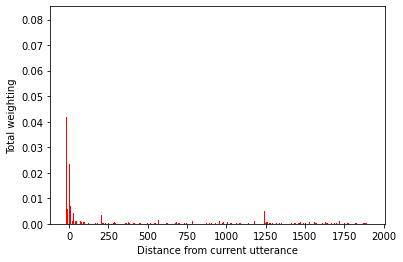

In [93]:
render_attns(
    datae,
    index=0,
    attn_head='all',
    mem_index=22,
    to_sum = True,
    plot='bar'
)

In [136]:
from torch.nn import functional as F

In [151]:
# input is of size N x C = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# each element in target has to have 0 <= value < C
target = torch.randn(3, 5)
kl = F.kl_div(input, target, reduction='none')


In [152]:
kl

tensor([[ 2.2284,  1.8699,  0.0000, -1.9337,  0.0000],
        [ 0.0000,  0.0000,  0.0000, -0.1187,  0.0000],
        [-0.5710, -0.7258,  0.0000, -0.2268, -0.6578]],
       grad_fn=<KlDivBackward0>)